In [41]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [42]:
image = cv2.imread("image.jpg",cv2.IMREAD_GRAYSCALE)

In [43]:
def show_img(image):
    if image is not None:
        cv2.imshow("Image",image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Error!")
        
def plot_img(img_list,img_titles):
    n = len(img_list)
    plt.figure(figsize=(7,n*2))
    for i in range(n):
        plt.subplot(n//2+1,2,i+1)
        plt.title(img_titles[i])
        plt.imshow(img_list[i],cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

## High pass filter

In [44]:
high_pass_filter = np.array([[-1,-1,-1],
                             [-1,8,-1],
                             [-1,-1,1]])
high_pass_image = cv2.filter2D(image,-1,high_pass_filter)

## Low pass filter

In [45]:
n = 7
total = n*n
low_pass_filter = 1/total*np.ones((n,n))
mean = 0
stddev = 5
noise = np.random.normal(mean, stddev, image.shape).astype(np.uint8)
noisy_image = cv2.add(image, noise)
low_pass_image = cv2.filter2D(noisy_image,-1,low_pass_filter)

## Fourier Transform

In [46]:
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)
f_image = np.log(np.abs(f_transform_shifted)+1)  

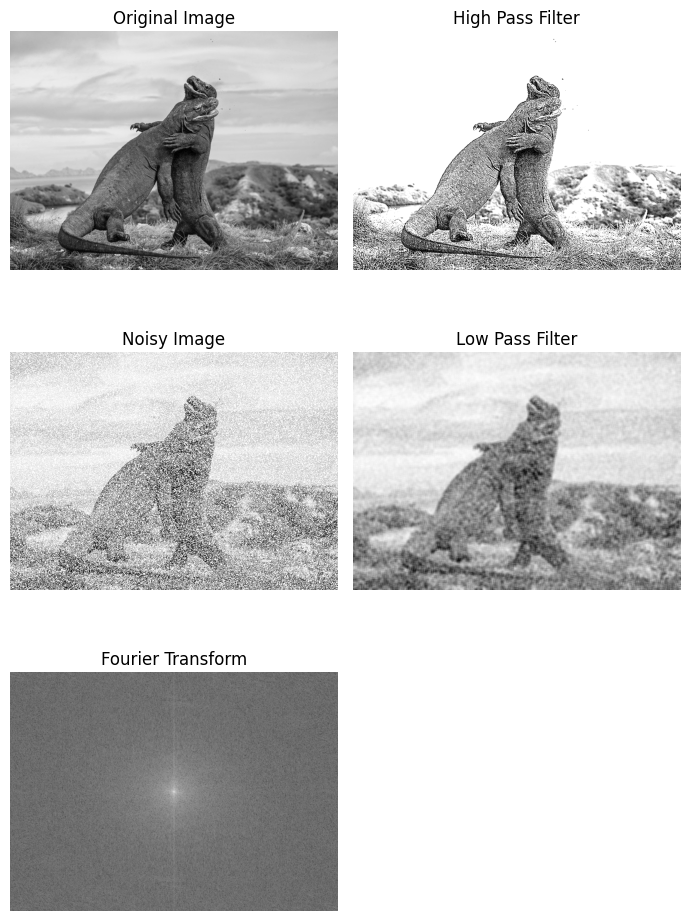

In [47]:
plot_img([image,high_pass_image,noisy_image,low_pass_image,f_image],['Original Image','High Pass Filter','Noisy Image','Low Pass Filter','Fourier Transform'])
